In [1]:
x = 1
prev_y = 1

for i in range(80):
    y = prev_y + i ** 2
    prev_y = y

    print(y)


1
2
6
15
31
56
92
141
205
286
386
507
651
820
1016
1241
1497
1786
2110
2471
2871
3312
3796
4325
4901
5526
6202
6931
7715
8556
9456
10417
11441
12530
13686
14911
16207
17576
19020
20541
22141
23822
25586
27435
29371
31396
33512
35721
38025
40426
42926
45527
48231
51040
53956
56981
60117
63366
66730
70211
73811
77532
81376
85345
89441
93666
98022
102511
107135
111896
116796
121837
127021
132350
137826
143451
149227
155156
161240
167481


In [41]:
from math import lcm, gcd, factorial

def F(n: int) -> int:
    return factorial(n) ** 3 * ((n + 1) * (n + 1) * (n + 2))

def baxter(n: int) -> list[int]:
    if n == 0:
        return [1]
    return [0] + [(2 * F(n - 1)) // (F(k - 1) * F(n - k)) for k in range(1, n + 1)]

def Baxter(n: int, k: int) -> int:
    return baxter(n)[k]

def baxter_row(n: int) -> list[int]:
    return [Baxter(n, k) for k in range(1, n + 1)]

def baxter_triangle(n: int) -> list[list[int]]:
    return [baxter_row(k) for k in range(1, n + 1)]

def baxter_triangle_print(n: int) -> None:
    for row in baxter_triangle(n):
        print(row)

def baxter_triangle_sum_by_row(n: int) -> list[int]:
    return [sum(row) for row in baxter_triangle(n)]

print(baxter_triangle_sum_by_row(50))

baxter_triangle_print(50)

[1, 2, 6, 22, 92, 422, 2074, 10754, 58202, 326240, 1882960, 11140560, 67329992, 414499438, 2593341586, 16458756586, 105791986682, 687782586844, 4517543071924, 29949238543316, 200234184620736, 1349097425104912, 9154276618636016, 62522506583844272, 429600060173571952, 2968354097506204352, 20616682170931488704, 143886306136373723072, 1008739441056488779984, 7101857696077190042814, 50197792010624790718274, 356134037157421426324858, 2535503283457453475113498, 18111330098002679241995204, 129775523667497672794119820, 932649996060323085135343660, 6721418743462792115061865000, 48568825344643221105258466964, 351844920522232388929981300716, 2554987813422078288794169298972, 18596055885560437500207978342572, 135644235608879594521014316895264, 991488035658098636545959755543168, 7261715593999548236305978326928768, 53286745759568455589698874494878272, 391734954014771562094562102701976912, 2884866707621100648995326107469142704, 21280832747254136400685727258623694064, 15723597069723210992157861863442013

In [92]:
def mapping_n_to_bins(n, bins):
    # generate all combinations of n items in bins
    # each item can be in any bin and bins need not be at least size 1
    # sum of all bins must be n

    total_bin_mapping = []

    def mapping_n_to_bins_helper(n, bins, bin_mapping):
        if n == 0:
            total_bin_mapping.append(bin_mapping)
            return
        if bins == 0:
            return
        for i in range(n + 1):
            mapping_n_to_bins_helper(n - i, bins - 1, bin_mapping + [i])
            
    mapping_n_to_bins_helper(n, bins, [])
    
    # get rid of all the cases where a bin is empty
    total_bin_mapping = [mapping for mapping in total_bin_mapping if 0 not in mapping]
    # get rid of all the cases where there are less than bins itemsd
    total_bin_mapping = [mapping for mapping in total_bin_mapping if len(mapping) >= bins]
    return total_bin_mapping


knowledge_mapping = {1:1, 2:2, 3:10, 4:62, 5:217}

magical_number = 2/3

total_n = 6
total_comb = 0

for i in range(2, total_n + 1):
    for bin_map in mapping_n_to_bins(total_n, i):
        print(bin_map)
        running_product = 1
        for bin_item in bin_map:
            running_product *= knowledge_mapping[bin_item]
        total_comb += running_product

if total_n == 5:
    total_comb += 2

total_comb *= 3
print(total_comb) 


def idontknowwhatthissequenceis(n):
    pass
# n = 3, 
# def f(n)
    # for i in 

[1, 5]
[2, 4]
[3, 3]
[4, 2]
[5, 1]
[1, 1, 4]
[1, 2, 3]
[1, 3, 2]
[1, 4, 1]
[2, 1, 3]
[2, 2, 2]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]
[4, 1, 1]
[1, 1, 1, 3]
[1, 1, 2, 2]
[1, 1, 3, 1]
[1, 2, 1, 2]
[1, 2, 2, 1]
[1, 3, 1, 1]
[2, 1, 1, 2]
[2, 1, 2, 1]
[2, 2, 1, 1]
[3, 1, 1, 1]
[1, 1, 1, 1, 2]
[1, 1, 1, 2, 1]
[1, 1, 2, 1, 1]
[1, 2, 1, 1, 1]
[2, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
3513


In [57]:
def nChoosem(n: int, m: int) -> int:
    return factorial(n) // (factorial(m) * factorial(n - m))

sum = 1
n = 4

for k in range(1, n):
    m = n + 1
    numu = nChoosem(m, k - 1) * nChoosem(m, k) * nChoosem(m, k + 1)
    denom = nChoosem(m, 1) * nChoosem(m, 2)
    sum += numu / denom

print(sum)

22.0


[[-1 -1  0]
 [ 1 -1  0]
 [ 1  1  0]
 [-1  1  0]]


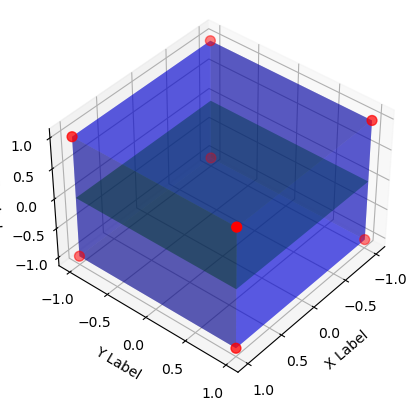

In [31]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# draw 3d surface cube python

points = np.array([[-1, -1, -1],
                      [1, -1, -1 ],
                      [1, 1, -1],
                      [-1, 1, -1],
                      [-1, -1, 1],
                      [1, -1, 1 ],
                      [1, 1, 1],
                      [-1, 1, 1]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

range = [-1,1]

ones = np.ones((2,2))

neg_ones = -1 * np.ones((2,2))


alp = 0.4
# plot all surfaces
X, Y = np.meshgrid(range, range)
ax.plot_surface(X,Y,ones, alpha=alp, color='b')
ax.plot_surface(X,Y, neg_ones, alpha=alp, color='b')

X, Z = np.meshgrid(range, range)
ax.plot_surface(X,ones,Z, alpha=alp, color='b')
ax.plot_surface(X,neg_ones,Z, alpha=alp, color='b')

Y, Z = np.meshgrid(range, range)
ax.plot_surface(ones,Y,Z, alpha=alp, color='b')
ax.plot_surface(neg_ones,Y,Z, alpha=alp, color='b')

ax.scatter(points[:,0], points[:,1], points[:,2], c='r', s=50)

ax.set_xlabel('X Label')

ax.set_ylabel('Y Label')

ax.set_zlabel('Z Label')

eps = 5e-2
# randomly determine a horizontal slicing plane and plot it
z = np.random.uniform(-1 + eps, 1 + eps)
z = 0

X, Y = np.meshgrid(range, range)
Z = z * np.ones((2,2))
ax.plot_surface(X,Y,Z, alpha=0.5, color='g')

# the current bounding box of the surface
four_bounding_pts = np.array([[-1, -1, z],
                      [1, -1, z ],
                      [1, 1, z],
                      [-1, 1, z]])

# plot the four bounding points
print(four_bounding_pts)


# check view angles
ax.view_init(azim=40, elev=40)
plt.show()



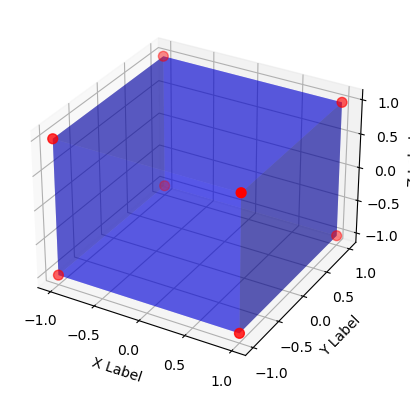

In [33]:
class cube:
    def __init__(self, lower_left, upper_right):
        self.lower_left = np.array([-1, -1, -1])
        self.upper_right = np.array([1, 1, 1])

    
    def get_x_range(self):
        return [min(self.points[:,0]), max(self.points[:,0])]
    
    def get_y_range(self):
        return [min(self.points[:,1]), max(self.points[:,1])]
    
    def get_z_range(self):
        return [min(self.points[:,2]), max(self.points[:,2])]
    
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        range = [-1,1]
        ones = np.ones((2,2))
        neg_ones = -1 * np.ones((2,2))

        alp = 0.4
        # plot all surfaces
        X, Y = np.meshgrid(range, range)
        ax.plot_surface(X,Y,ones, alpha=alp, color='b')
        ax.plot_surface(X,Y, neg_ones, alpha=alp, color='b')

        X, Z = np.meshgrid(range, range)
        ax.plot_surface(X,ones,Z, alpha=alp, color='b')
        ax.plot_surface(X,neg_ones,Z, alpha=alp, color='b')

        Y, Z = np.meshgrid(range, range)
        ax.plot_surface(ones,Y,Z, alpha=alp, color='b')
        ax.plot_surface(neg_ones,Y,Z, alpha=alp, color='b')

        ax.scatter(points[:,0], points[:,1], points[:,2], c='r', s=50)

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        plt.show()

    
    def slice_x(self, x):
        # the new x should be within the range of the cube
        assert x >= self.get_x_range()[0] and x <= self.get_x_range()[1]
        # use the new x to replace the max x of the cube
        new_points_larger_half = np.copy(self.points)
        


cube1 = cube(points)
cube1.plot()
